In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ftrain, ftest = h5py.File('train_catvnoncat.h5','r'), h5py.File('test_catvnoncat.h5')
print(ftrain.keys(),'\n',ftest.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']> 
 <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [3]:
print(ftrain['list_classes'])
print(ftrain['train_set_x'])
print(ftrain['train_set_y'])

<HDF5 dataset "list_classes": shape (2,), type "|S7">
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">


In [4]:
class_data = ftrain['list_classes']
Classes = class_data[:]
#we can do it in the following way also
# Classes = list(class_data)
Classes


array([b'non-cat', b'cat'], dtype='|S7')

In [5]:
X_data,X_data_test = ftrain['train_set_x'], ftest['test_set_x']
X_train_orig , X_test_orig= X_data[:],X_data_test[:]
X_train_orig,X_test_orig

(array([[[[ 17,  31,  56],
          [ 22,  33,  59],
          [ 25,  35,  62],
          ...,
          [  1,  28,  57],
          [  1,  26,  56],
          [  1,  22,  51]],
 
         [[ 25,  36,  62],
          [ 28,  38,  64],
          [ 30,  40,  67],
          ...,
          [  1,  27,  56],
          [  1,  25,  55],
          [  2,  21,  51]],
 
         [[ 32,  40,  67],
          [ 34,  42,  69],
          [ 35,  42,  70],
          ...,
          [  1,  25,  55],
          [  0,  24,  54],
          [  1,  21,  51]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   

In [6]:
Y_data, Y_data_test= ftrain['train_set_y'],ftest['test_set_y']
Y_train_orig = Y_data[:]
Y_test_orig=Y_data_test[:]
print(Y_train_orig)
print(Y_train_orig.shape, Y_test_orig.shape)

[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
(209,) (50,)


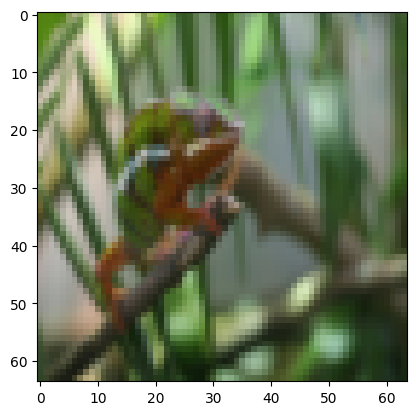

In [7]:
#showing image

index = 120

plt.imshow(X_train_orig[index])

In [8]:
#flattening

'''X_train_flat = X_train_orig.reshape(X_train_orig.shape[0],X_train_orig.shape[1]*X_train_orig.shape[2]*X_train_orig.shape[3])
X_test_flat=X_test_orig.reshape(X_test_orig.shape[0],X_test_orig.shape[1]*X_test_orig.shape[2]*X_test_orig.shape[3])

#standardise values to 0 to 1
X_train = X_train_flat/255
X_test=X_test_flat/255

print(X_train.shape, X_test.shape)'''

'X_train_flat = X_train_orig.reshape(X_train_orig.shape[0],X_train_orig.shape[1]*X_train_orig.shape[2]*X_train_orig.shape[3])\nX_test_flat=X_test_orig.reshape(X_test_orig.shape[0],X_test_orig.shape[1]*X_test_orig.shape[2]*X_test_orig.shape[3])\n\n#standardise values to 0 to 1\nX_train = X_train_flat/255\nX_test=X_test_flat/255\n\nprint(X_train.shape, X_test.shape)'

In [9]:
import torch 
import torch.nn as nn
import torchvision
import torch.nn.functional as F 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [10]:
X_train=torch.from_numpy(X_train_orig)
Y_train=torch.from_numpy(Y_train_orig)
X_test=torch.from_numpy(X_test_orig)
Y_test=torch.from_numpy(Y_test_orig)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

(torch.Size([209, 64, 64, 3]),
 torch.Size([209]),
 torch.Size([50, 64, 64, 3]),
 torch.Size([50]))

In [11]:

X_test = X_test.permute(0, 3, 1, 2)  # swap the axes to get shape [50, 3, 64, 64]
print(X_test.shape)  # torch.Size([50, 3, 64, 64])
X_test

torch.Size([50, 3, 64, 64])


tensor([[[[158, 161, 162,  ..., 170, 167, 172],
          [158, 160, 162,  ..., 169, 164, 168],
          [158, 161, 162,  ..., 173, 169, 168],
          ...,
          [102,  44,  28,  ..., 163, 163, 166],
          [ 99,  38,  30,  ..., 161, 164, 168],
          [127,  39,  30,  ..., 165, 169, 173]],

         [[104, 106, 107,  ..., 120, 121, 127],
          [103, 104, 105,  ..., 118, 117, 121],
          [104, 105, 105,  ..., 123, 122, 122],
          ...,
          [ 68,  31,  23,  ..., 118, 120, 121],
          [ 67,  28,  26,  ..., 117, 121, 123],
          [ 95,  29,  25,  ..., 122, 126, 128]],

         [[ 83,  85,  84,  ..., 100, 103, 109],
          [ 82,  82,  83,  ...,  99,  98, 104],
          [ 82,  82,  83,  ..., 102, 104, 104],
          ...,
          [ 52,  23,  20,  ..., 102, 103, 105],
          [ 51,  22,  23,  ..., 100, 104, 106],
          [ 72,  22,  22,  ..., 105, 109, 110]]],


        [[[115, 137, 155,  ..., 159, 141, 121],
          [123, 143, 159,  ..., 167

In [12]:

X_train = X_train.permute(0, 3, 1, 2)  # swap the axes to get shape [50, 3, 64, 64]
print(X_train.shape)  # torch.Size([50, 3, 64, 64])
X_train

torch.Size([209, 3, 64, 64])


tensor([[[[ 17,  22,  25,  ...,   1,   1,   1],
          [ 25,  28,  30,  ...,   1,   1,   2],
          [ 32,  34,  35,  ...,   1,   0,   1],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         [[ 31,  33,  35,  ...,  28,  26,  22],
          [ 36,  38,  40,  ...,  27,  25,  21],
          [ 40,  42,  42,  ...,  25,  24,  21],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]],

         [[ 56,  59,  62,  ...,  57,  56,  51],
          [ 62,  64,  67,  ...,  56,  55,  51],
          [ 67,  69,  70,  ...,  55,  54,  51],
          ...,
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0],
          [  0,   0,   0,  ...,   0,   0,   0]]],


        [[[196, 193, 188,  ...,  90,  90,  90],
          [230, 204, 193,  ...,  91

In [13]:
X_train=X_train/255
X_test=X_test/255
X_train,X_test

(tensor([[[[0.0667, 0.0863, 0.0980,  ..., 0.0039, 0.0039, 0.0039],
           [0.0980, 0.1098, 0.1176,  ..., 0.0039, 0.0039, 0.0078],
           [0.1255, 0.1333, 0.1373,  ..., 0.0039, 0.0000, 0.0039],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.1216, 0.1294, 0.1373,  ..., 0.1098, 0.1020, 0.0863],
           [0.1412, 0.1490, 0.1569,  ..., 0.1059, 0.0980, 0.0824],
           [0.1569, 0.1647, 0.1647,  ..., 0.0980, 0.0941, 0.0824],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.2196, 0.2314, 0.2431,  ..., 0.2235, 0.2196, 0.2000],
           [0.2431, 0.2510, 0.2627,  ..., 0.2196, 0.2157, 0.2000],
           [0.2627, 0.27

In [121]:
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

Y_train.shape,Y_test.shape

(torch.Size([209, 1]), torch.Size([50, 1]))

In [122]:
X_train = X_train.to(dtype=torch.float32)
X_test=X_test.to(dtype=torch.float32)

Y_train=Y_train.to(dtype=torch.float32)
Y_test=Y_test.to(dtype=torch.float32)

In [123]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# making batches


In [174]:
from torch.utils.data import TensorDataset, DataLoader

In [175]:
train_dataset=TensorDataset(X_train,Y_train)

batch_size=20

train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

In [176]:
train_loader

# Model Architecture

a CNN model needs a well defined blueprint first, 

here 
input layer-> ConvLayer-> relu act-> pooling -> ConvLayer2-> relu act-> pool -> Flatten the matrix -> fc1-> fc2-> out(sigmoid cause binary)

In [177]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(3,16,10,bias=True).float()   #nn.Conv2d( channels_in , channels_out, filter size)  in= 64x64, out= n-f+1  = 55
        self.pool=nn.MaxPool2d(2,2)   # filter size, stride   maxpooled dims=27x27
        self.conv2=nn.Conv2d(16,128,10,bias=True).float()  # out size= 27-10+1 = 18
        self.pool2=nn.MaxPool2d(2,2)  # 9x9 with 128 channels => total = 128*9*9

        #now we come to the fully connected layers, got to put the flattened dimensions in the input and output

        self.fc1=nn.Linear(10368,1024)
        self.fc2=nn.Linear(1024,64)
        self.fc3=nn.Linear(64,32)
        self.fc4=nn.Linear(32,1)


    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool2(x)
        #flattening the matrix now
        x=x.reshape(-1,128*9*9)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)

        x=torch.sigmoid(x)
        return x

In [190]:
model=ConvNet()

In [191]:
learning_rate=0.001

In [192]:
criterion= nn.BCELoss()

optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-4)

X_train.shape

torch.Size([209, 3, 64, 64])

In [193]:
l2_lambda=1e-5
for epochs in range(100):
    #for i, (batch_data,batch_labels) in enumerate(train_loader):


    #forward pass
    output=model(X_train)
    #print(output.shape)
    loss=criterion(output,Y_train)

    #regularization
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param, 2)**2
    loss += l2_lambda * l2_reg
    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epochs+1)%20 ==0:
        print(f'epoch={epochs+1}, loss= {loss.item()}')

epoch=20, loss= 0.5992334485054016
epoch=40, loss= 0.4547204077243805
epoch=60, loss= 0.4134351909160614
epoch=80, loss= 0.327226847410202
epoch=100, loss= 0.3147798776626587


In [194]:
test_out=model(X_test)

test_out

tensor([[7.2830e-01],
        [7.3469e-01],
        [7.1564e-01],
        [7.1139e-01],
        [7.1660e-01],
        [5.4316e-03],
        [7.1419e-01],
        [7.1476e-01],
        [7.1988e-01],
        [7.6956e-01],
        [7.5018e-01],
        [5.2921e-01],
        [7.3759e-01],
        [1.2183e-02],
        [7.6491e-05],
        [1.6887e-01],
        [7.6164e-06],
        [7.2514e-01],
        [5.2784e-01],
        [3.6837e-02],
        [4.0415e-01],
        [1.6475e-01],
        [4.6484e-06],
        [7.2893e-01],
        [7.3238e-01],
        [7.2948e-01],
        [6.9327e-01],
        [1.7697e-02],
        [7.1090e-01],
        [1.2781e-05],
        [6.9337e-01],
        [7.3678e-01],
        [5.9897e-01],
        [7.2880e-01],
        [3.4117e-02],
        [7.1943e-01],
        [2.5545e-02],
        [7.1602e-01],
        [3.7353e-02],
        [9.1617e-02],
        [4.4234e-01],
        [6.4286e-06],
        [5.0073e-01],
        [2.3388e-01],
        [9.3259e-02],
        [5

In [195]:
correct=0
for i in range(len(test_out)):
    if test_out[i]>0.5:
        test_out[i]=1
    else:
        test_out[i]=0


for i in range(len(test_out)):
    if test_out[i]==Y_test[i]:
        correct+=1

print(correct/(Y_test.shape[0]))

for i in range(len(test_out)):
    if test_out[i]==0 and Y_test[i]==1:
        print(i,end=' ')    
    

0.84
15 19 20 40 41 47 48 

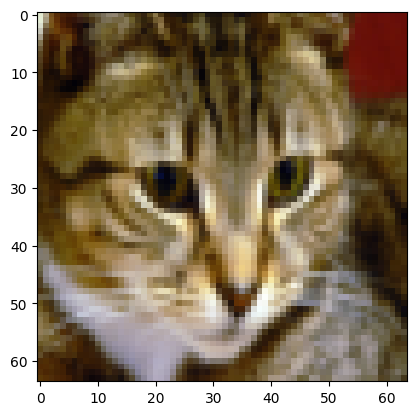

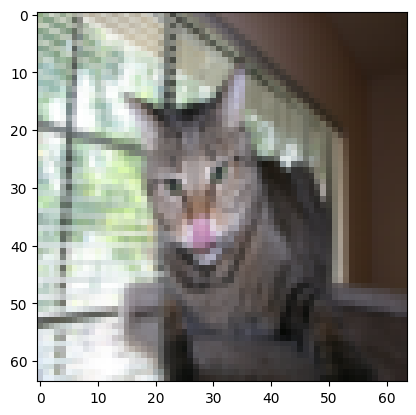

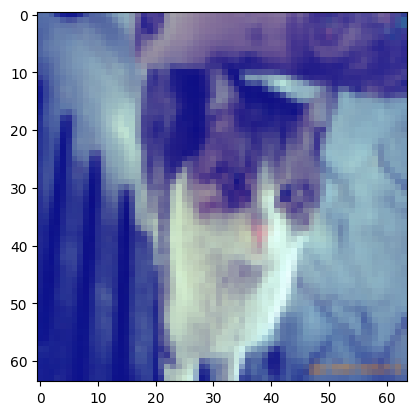

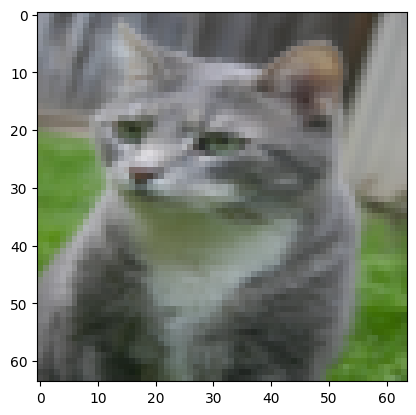

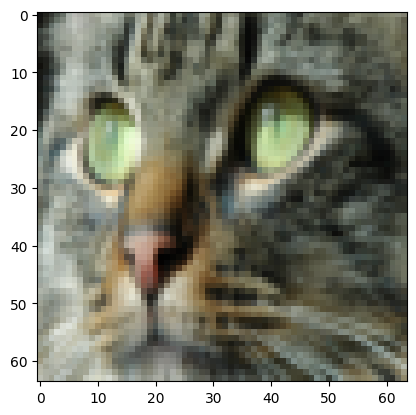

In [173]:
index = [15 ,20, 41, 46, 48 ]
for i in index:
    plt.imshow(X_test_orig[i])
    plt.show()